In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from urllib.parse import urlparse

In [2]:
jsonq = pd.read_json('java-results/JSON2/json-queries-performance.json',convert_dates=False)

In [3]:
jsonq[jsonq['step'] == "Forecast Entire Query Process"]['execution_time_seconds'].describe()

count    100.000000
mean       0.357780
std        0.128568
min        0.251000
25%        0.288000
50%        0.303000
75%        0.381000
max        1.064000
Name: execution_time_seconds, dtype: float64

In [4]:
jsonq[jsonq['step'] == "HubSpot Entire Query Process"]['execution_time_seconds'].describe()

count    100.000000
mean       3.266880
std        0.542355
min        2.429000
25%        2.928500
50%        3.074000
75%        3.456250
max        5.080000
Name: execution_time_seconds, dtype: float64

In [5]:
postq = pd.read_json('java-results/POST2/post-queries-performance.json',convert_dates=False)

In [6]:
postq[postq['step'] == "Forecast Entire Query Process"]['execution_time_seconds'].describe()

count    100.000000
mean       0.419930
std        0.220896
min        0.258000
25%        0.301000
50%        0.337000
75%        0.416000
max        1.377000
Name: execution_time_seconds, dtype: float64

In [7]:
postq[postq['step'] == "HubSpot Entire Query Process"]['execution_time_seconds'].describe()

count    100.000000
mean       2.085650
std        0.368388
min        1.561000
25%        1.822750
50%        1.984500
75%        2.263750
max        3.488000
Name: execution_time_seconds, dtype: float64

In [8]:
jsonapilatency = pd.read_json('java-results/JSON2/json-api-latency.json',convert_dates=False)

In [9]:
jsonapilatency['base_url'] = jsonapilatency['url'].apply(lambda x: urlparse(x).netloc)

In [10]:
jsonapilatency['url_group'] = (jsonapilatency['base_url'] != jsonapilatency['base_url'].shift()).cumsum()


In [11]:
result = jsonapilatency.groupby('url_group').agg({
    'base_url': 'first',  # Keep the base URL
    'latency_seconds': 'sum'  # Sum latency seconds
}).reset_index(drop=True)

In [12]:
result[result['base_url'] == 'api.forecastapp.com'].describe()

,latency_seconds
count,100.000000
mean,0.309020
std,0.109118
min,0.224000
25%,0.243000
50%,0.258000
75%,0.333250
max,0.709000


In [13]:
result[result['base_url'] == 'api.hubapi.com'].describe()

,latency_seconds
count,100.000000
mean,2.848690
std,0.529108
min,2.189000
25%,2.490000
50%,2.639000
75%,3.042250
max,4.678000


In [14]:
postapilatency = pd.read_json('java-results/POST2/post-api-latency.json',convert_dates=False)

In [15]:
postapilatency['base_url'] = postapilatency['url'].apply(lambda x: urlparse(x).netloc)


In [16]:
postapilatency['url_group'] = (postapilatency['base_url'] != postapilatency['base_url'].shift()).cumsum()

In [17]:
resultPOST = postapilatency.groupby('url_group').agg({
    'base_url': 'first',  # Keep the base URL
    'latency_seconds': 'sum'  # Sum latency seconds
}).reset_index(drop=True)

In [18]:
resultPOST[resultPOST['base_url'] == 'api.forecastapp.com'].describe()

,latency_seconds
count,100.000000
mean,0.375350
std,0.202719
min,0.232000
25%,0.265000
50%,0.295500
75%,0.375000
max,1.090000


In [40]:
resultPOST[resultPOST['base_url'] == 'api.hubapi.com'].describe()

,latency_seconds
count,100.000000
mean,1.816940
std,0.337042
min,1.296000
25%,1.574000
50%,1.747500
75%,1.974500
max,2.963000


In [19]:
POSThubspotAPI_mean = resultPOST[resultPOST['base_url'] == 'api.hubapi.com']['latency_seconds'].mean()

In [20]:
POSThubspotQ_mean = postq[postq['step'] == 'HubSpot Entire Query Process']['execution_time_seconds'].mean()

In [21]:
POSThubspotQ_mean - POSThubspotAPI_mean

np.float64(0.26871)

In [22]:
POSTforecastAPI_mean = resultPOST[resultPOST['base_url'] == 'api.forecastapp.com']['latency_seconds'].mean()

In [23]:
POSTforecastQ_mean =postq[postq['step'] == 'Forecast Entire Query Process']['execution_time_seconds'].mean()

In [24]:
POSTforecastQ_mean - POSTforecastAPI_mean

np.float64(0.044580000000000064)

In [25]:
JSONhubspotAPI_mean = result[result['base_url'] == 'api.hubapi.com']['latency_seconds'].mean()

In [26]:
JSONhubspotQ_mean =jsonq[jsonq['step'] == 'HubSpot Entire Query Process']['execution_time_seconds'].mean()

In [27]:
JSONhubspotQ_mean - JSONhubspotAPI_mean

np.float64(0.4181899999999996)

In [28]:
JSONforecastAPI_mean = result[result['base_url'] == 'api.forecastapp.com']['latency_seconds'].mean()

In [29]:
JSONforecastQ_mean =jsonq[jsonq['step'] == 'Forecast Entire Query Process']['execution_time_seconds'].mean()

In [30]:
JSONforecastQ_mean - JSONforecastAPI_mean

np.float64(0.04875999999999997)

#### Performance

In [31]:
jsonq_usage = pd.read_json('java-results/JSON2/json-resource-usage.json',convert_dates=False)

In [39]:
jsonq_usage[['cpu_percent','memory_percent']].describe()

,cpu_percent,memory_percent
count,749.000000,749.000000
mean,6.285512,0.092113
std,6.067451,0.026987
min,0.000000,0.030254
25%,1.995012,0.070624
50%,3.422983,0.087625
75%,10.268949,0.113474
max,43.037975,0.147399


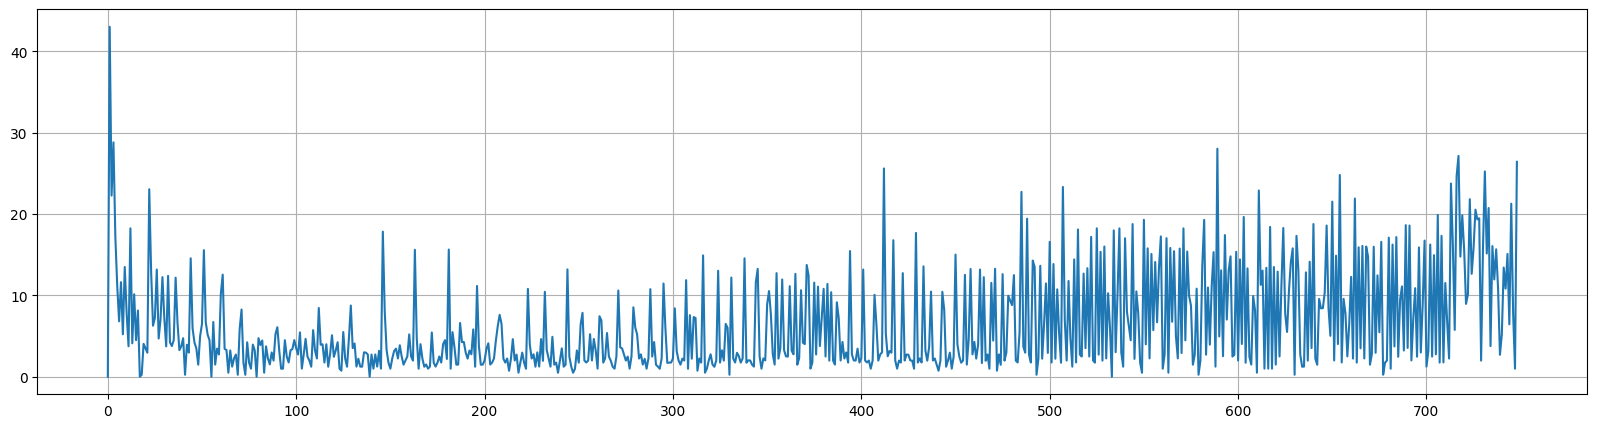

In [33]:
jsonq_usage['cpu_percent'].plot(figsize = (20,5), grid = True);

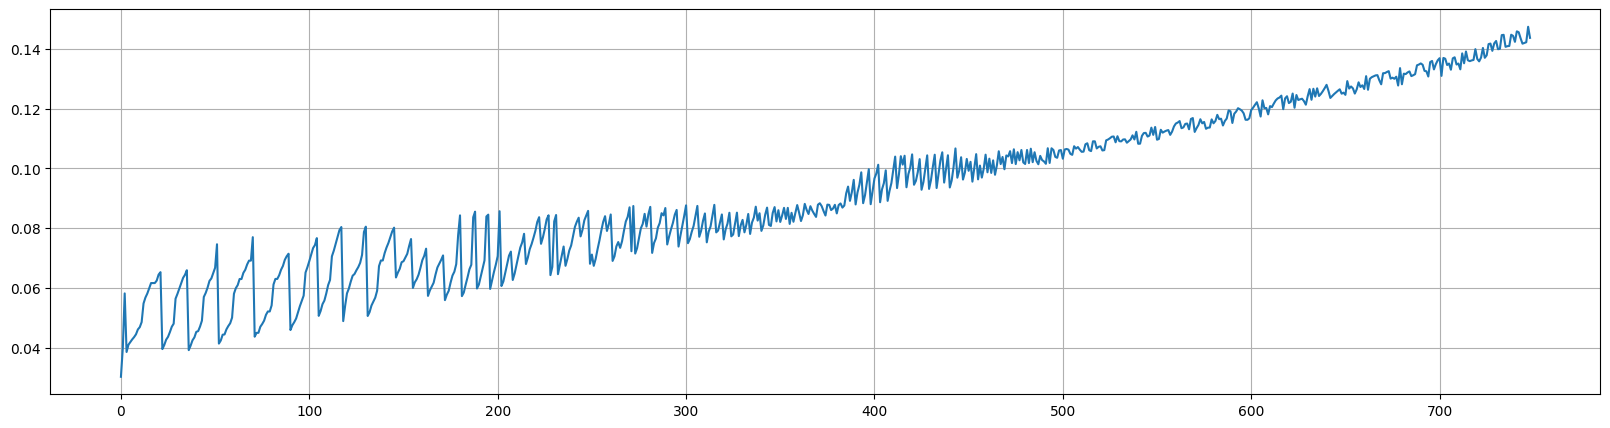

In [34]:
jsonq_usage['memory_percent'].plot(figsize = (20,5), grid = True);

In [35]:
postq_usage = pd.read_json('java-results/POST2/post-resource-usage.json',convert_dates=False)

In [36]:
postq_usage[['cpu_percent','memory_percent']].describe()

,cpu_percent,memory_percent
count,543.000000,543.000000
mean,3.056948,0.060022
std,3.284963,0.012417
min,0.000000,0.030509
25%,1.496259,0.050218
50%,2.233251,0.059839
75%,3.685526,0.069935
max,47.602131,0.084606


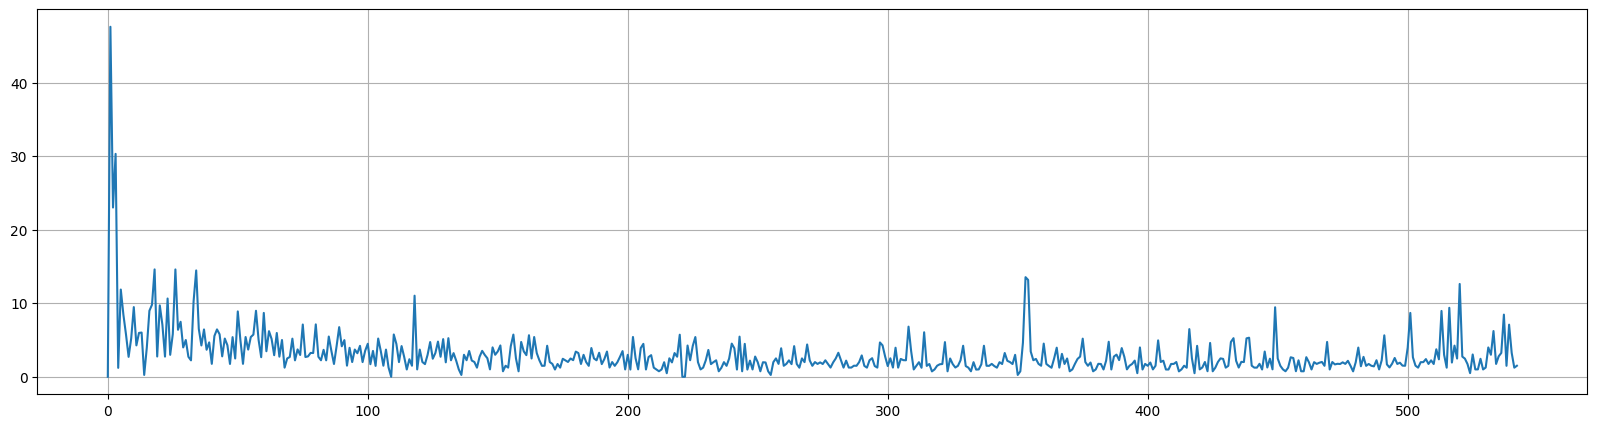

In [37]:
postq_usage['cpu_percent'].plot(figsize = (20,5), grid = True);

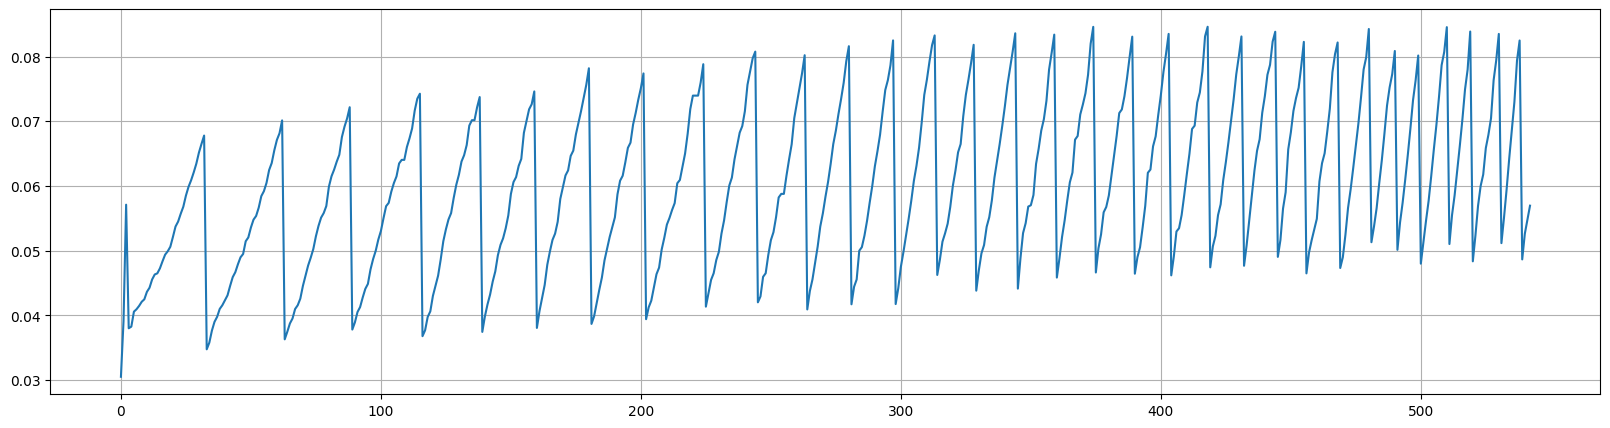

In [38]:
postq_usage['memory_percent'].plot(figsize = (20,5), grid = True);